# Forward

If you haven't already, check out the Welcome Notebook/Markdown on the front page of this Repository! It will give you an idea of what this Repo is all about, and who I am too!

# Prerequisites

 

You may want to have a basic background in Math or Statistics, but I will try my best to explain things at a very simple level to make it understandable to all audiences. Additionally, as of now, I plan to make this entirely in Python. Perhaps there will be some R if I go over informatics type topics.. but I'm not there yet. Nonetheless, a basic understanding of programming will be helpful, but I will comment and annotate everything to the best of my ability.

# Chapter 1: Machine Learning Overview

### 1.1 Introduction

Let's start with a definition. Wikipedia defines machine learning as "the study of computer algorithms that improve automatically through experience" [https://en.wikipedia.org/wiki/Machine_learning]. In case you don't know, an algorithm is just a set of instructions that a computer can follow to solve some problem. Using these definitions, a good way to think of a machine learning algorithm is a set of instructions, which can change and improve with experience, and that a computer can follow to solve a problem. Hopefully in some vague capacity that makes sense, and if not, don't worry, the following examples might help.

Machine learning is a hot phrase is tech these days. Don't let it scare you though, you may have encountered it before. If you've ever seen a trend line (line of best fit) in a graph, you've encountered a machine learning algorithm. Below is an example of a trend line.

In [48]:
# If you dont know Python or programming, just ignore these lines for now.
# If your mind can't ignore these lines: It's not feasible to plot a graph
# purely using Python's built in capabilities. You need to "import" some 
# outside packages like matplotlib to do so.
# The second import imports the ability to plot a trend line. More detail
# on this later
# The third import imports numpy, a set of functions and algorithms that 
# simply put, make coding in python easy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
import numpy as np

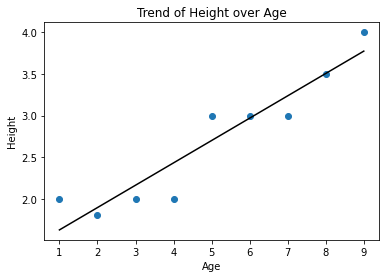

In [20]:
# Here I'm going to create some random, 2D data. An X, and Y cooridinate
# For now, I'm going to keep the X and Y values separate in arrays
# You will see a "reshape" function called, this is to ensure that the 
# input for the trend line algorithm up ahead is the correct shape

X = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y = np.array([2,1.8,2,2,3,3,3,3.5,4])

# Here it is, a machine learning algorithm! We are coding a Linear Regression
# which is a simple form of the trend line you may already be used to. 
# The "fit" function makes sure our line follows the trend of the data.
# More on this later

trend_line = LinearRegression().fit(X,y)

# Once we have created our algorithm (the line above), we can visualize it by 
# printing its values over a specified range of data. Since the random 2D data 
# we used as input was from 1 to 9, we will visualize the line from 1 to 9 as well.

X_trend_line = np.array(range(1,10)).reshape(-1,1)
y_trend_line = trend_line.predict(X_trend_line)

plt.scatter(X,y)
plt.plot(X_trend_line,y_trend_line, color = 'black')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Trend of Height over Age')
plt.show()

The trend line above is a Machine Learning algorithm, albeit, a very basic one. You can think of a line as a set of instructions. If you know the formula to calulcate and visualize this line, you can use the formula as a guide, or set of instructions.

The data here shows an example of different people's heights at different ages. The general trend is that height increases with age. Our machine learning algorithm solves the following question: what is the average height of a person at a given age. The machine learning algorithm solves this problem from experience, it used the data points on the plot above to create a formula that solves the above problem. This formula can be used to input any age, and output an average height. 

Note: I completely made up data for this example. I guessed that a newborn probably is between a foot and 2 feet in height, and a 9 year old is probably around 4 feet in height, and filled in randomness in between. 

You've probably seen the form of the formula for this line before. It follows the form y = (m * x) + b. Lets print the formula below.

In [25]:
m = trend_line.coef_[0]
b = trend_line.intercept_

print("y = (%f * x) + %f" % (m, b))

y = (0.268333 * x) + 1.358333


So theres our machine learning algorithm, in a tangible formula. The formula is the set of instructions. Lets use it to solve the following problem: what is the average height of a 10 year old?

In [26]:
x = 10
print("y = (%f * %f) + %f" % (m, x, b))
print("y = %f" % ((m*x)+b))

y = (0.268333 * 10.000000) + 1.358333
y = 4.041667


Our algorithm says 4.04 feet! 

So there you go, we created a set of instructions (in this case, a formula that takes the form of y = (m * x) + b), that improved itself from experience (determined the values of m and b by "looking at" the data) to solve a problem (what is the average height of a person?). 

Pretty cool right? Why don't we expand on this a bit. What does our algorithm say for someone who is 80?

In [27]:
x = 80
print("y = (%f * %f) + %f" % (m, x, b))
print("y = %f" % ((m*x)+b))

y = (0.268333 * 80.000000) + 1.358333
y = 22.825000


Uh oh. Our algorithm says that they would be 22.8 feet in height. What went wrong? 

Remember how the definition of a machine learning algorithm is to improve based on experience? Well here, our algorithm is pretty inexperienced. It only knows heights for people from age 1 to 9. It needs more experience, which means more data.

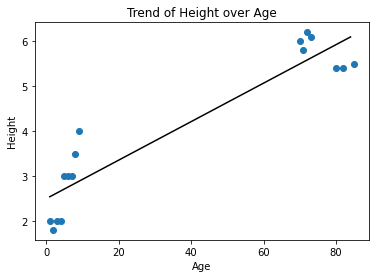

In [29]:
# This is all the same code from before, except I'm adding some heights for people in their 70s and 80s.

X = np.array([1,2,3,4,5,6,7,8,9,70,71,72,73,80,82,85]).reshape(-1,1)
y = np.array([2,1.8,2,2,3,3,3,3.5,4,6,5.8,6.2,6.1,5.4,5.4,5.5])

trend_line = LinearRegression().fit(X,y)

X_trend_line = np.array(range(1,85)).reshape(-1,1)
y_trend_line = trend_line.predict(X_trend_line)

plt.scatter(X,y)
plt.plot(X_trend_line,y_trend_line, color = 'black')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Trend of Height over Age')
plt.show()

So we added data that the algorithm can gain experience from, heights of people above the age of 70. You may notice that the trend line looks a little off, but lets try it out anyways, lets have our algorithm solve what the average height of someone who is 75 is.

In [31]:
m = trend_line.coef_[0]
b = trend_line.intercept_
x = 75
print("y = (%f * %f) + %f" % (m, x, b))
print("y = %f" % ((m*x)+b))

y = (0.042860 * 75.000000) + 2.495418
y = 5.709949


The algorithm says 5.7 feet, thats much more realistic! Lets check with someone in their 20s now.

In [32]:
m = trend_line.coef_[0]
b = trend_line.intercept_
x = 20
print("y = (%f * %f) + %f" % (m, x, b))
print("y = %f" % ((m*x)+b))

y = (0.042860 * 20.000000) + 2.495418
y = 3.352626


Hmmm. This seems off now. The average height of someone who is 20 is likely not 3.35 feet. So whats wrong? Well, the last time something was wrong, it was because the algorithm did not have enough experience (enough data). Lets try to as much data as we can to make this dataset realistic.

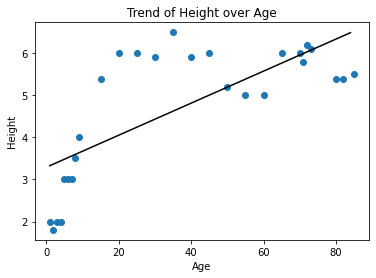

In [37]:
# This is all the same code from before, except I'm adding some heights for people in their 70s and 80s.

X = np.array([1,2,3,4,5,6,7,8,9,
              15,20,25,30,35,40,45,50,55,60,65,
              70,71,72,73,80,82,85]).reshape(-1,1)
y = np.array([2,1.8,2,2,3,3,3,3.5,4,
              5.4,6,6,5.9,6.5,5.9,6,5.2,5,5,6,
              6,5.8,6.2,6.1,5.4,5.4,5.5])

trend_line = LinearRegression().fit(X,y)

X_trend_line = np.array(range(1,85)).reshape(-1,1)
y_trend_line = trend_line.predict(X_trend_line)

plt.scatter(X,y)
plt.plot(X_trend_line,y_trend_line, color = 'black')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Trend of Height over Age')
plt.show()

Now we've added in a lot of data, there are a lot of ages between 1 and 85 represented, and generally, you can see a trend that height increases until around 20, and then levels off. Over algorithm doesn't look like it follows this trend though... Let's test it out for sure

In [42]:
m = trend_line.coef_[0]
b = trend_line.intercept_
x = 1
print("y = (%f * %f) + %f" % (m, x, b))
print("y = %f" % ((m*x)+b))

y = (0.038121 * 1.000000) + 3.288617
y = 3.326738


In [39]:
m = trend_line.coef_[0]
b = trend_line.intercept_
x = 20
print("y = (%f * %f) + %f" % (m, x, b))
print("y = %f" % ((m*x)+b))

y = (0.038121 * 20.000000) + 3.288617
y = 4.051040


In [43]:
m = trend_line.coef_[0]
b = trend_line.intercept_
x = 80
print("y = (%f * %f) + %f" % (m, x, b))
print("y = %f" % ((m*x)+b))

y = (0.038121 * 80.000000) + 3.288617
y = 6.338310


Now someone who is 1 year old is 3.3 feet tall, someone who is 20 is 4 feet tall, and someone who is 80 is 6.3 feet tall. All wrong. But our dataset is pretty good now. What happened?

The form of the algorithm that we chose, a Linear Regression, is very limited. It is completely linear, and does not model that "leveling off" that we saw in the data set. We need an algorithm that can fit to this data better. 

Lets make a smoothed trend line. For now, you don't need to worry about how, but the idea is to make a line than can curve with the data.

In [50]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

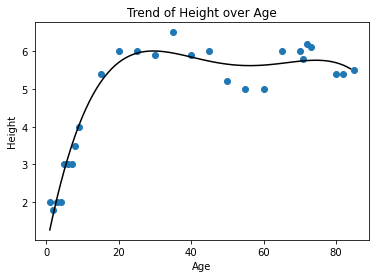

In [57]:
# This is all the same code from before, except I'm adding some heights for people in their 70s and 80s.

X = np.array([1,2,3,4,5,6,7,8,9,
              15,20,25,30,35,40,45,50,55,60,65,
              70,71,72,73,80,82,85]).reshape(-1,1)
y = np.array([2,1.8,2,2,3,3,3,3.5,4,
              5.4,6,6,5.9,6.5,5.9,6,5.2,5,5,6,
              6,5.8,6.2,6.1,5.4,5.4,5.5])

trend_line = make_pipeline(PolynomialFeatures(4), Ridge()).fit(X,y)

X_trend_line = np.array(range(1,85)).reshape(-1,1)
y_trend_line = trend_line.predict(X_trend_line)

plt.scatter(X,y)
plt.plot(X_trend_line,y_trend_line, color = 'black')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Trend of Height over Age')
plt.show()

Visually, this looks so much better. Lets run that last set of tests again.

In [61]:
trend_line.predict([[1],[20],[85]])

array([1.26756099, 5.69879796, 5.47125411])

Now the algorithm reports that for a 1 year old, the height should be 1.2 feet, for a 20 year old the height should 5.7 feet, and for an 85 year old the height should be 5.4 feet. This is a lot better!

Okay, we just covered a ton, so lets recap a bit.

A machine learning algorithm is a set of instructions that are tuned based on experience. A set of instructions is also known as an algorithm, and an algorithm could look like a formula. Experience typically comes in the form of data, and we "feed" this data to the algorithm to have it tune itself/it's instructions. We implemented this idea by creating a dataset, showing this dataset to a type of machine learning algorithm that tuned its parameters around the data, and then was able to solve problems for us based on the data set.

That's alot, and hopefully the whole machine learning idea is clearer now. 

We are missing a lot though. You're maybe wondering where the impressive aspects are. You've probably heard that Machine Learning can be used to identify cancer, drive autonomous vehicles, or other really complicated things. But what you may not realize is the way all these things are accomplished is not so far off from the exercise we just went through. To do complicated things like identify objects in an image, algorithms are created in a similar fashion. They are shown data, and discover trends and features in the data that allow them to predict an answer to a problem. 

You are right though, we are missing a lot of material to get to that really advanced level. Even in this example we went through, there are unanswered questions. How did I know we needed the algorithm to see more data? How did I know what type of algorithm to use to follow a curved trend? How do these algorithms "learn"/"fit" to a dataset? What if the dataset is more complicated? How do we ensure our algorithm is accurate if we can't easily "plug and chug" into a formula? How can an algorithm learn from an image? 

I'm sure theres more questions. We will get to it all (hopefully)! For now, pat yourself on the back, you got this far!